In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
data=pd.read_csv("tested.csv")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
data=pd.read_csv("tested.csv")

In [7]:
data.head()
#data.dtypes

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
data['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [8]:
data['Fare'].unique()[0:20]

array([ 7.8292,  7.    ,  9.6875,  8.6625, 12.2875,  9.225 ,  7.6292,
       29.    ,  7.2292, 24.15  ,  7.8958, 26.    , 82.2667, 61.175 ,
       27.7208, 12.35  ,  7.225 ,  7.925 , 59.4   ,  3.1708])

<AxesSubplot:>

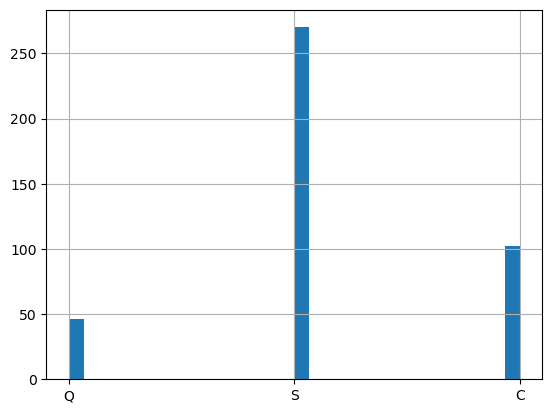

In [9]:
data['Embarked'].hist(bins=30)

<AxesSubplot:>

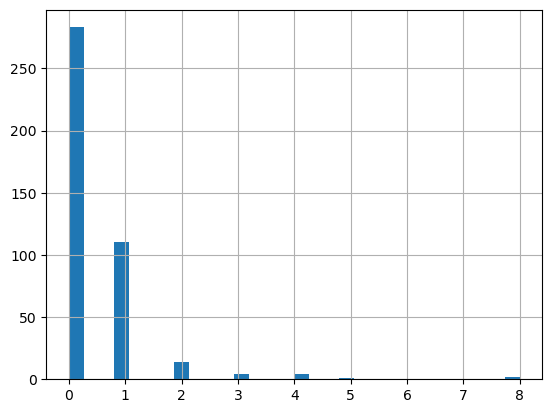

In [11]:
data['SibSp'].hist(bins=30)

In [13]:
data.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                     

In [14]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

Text(0.5, 1.0, 'total graph')

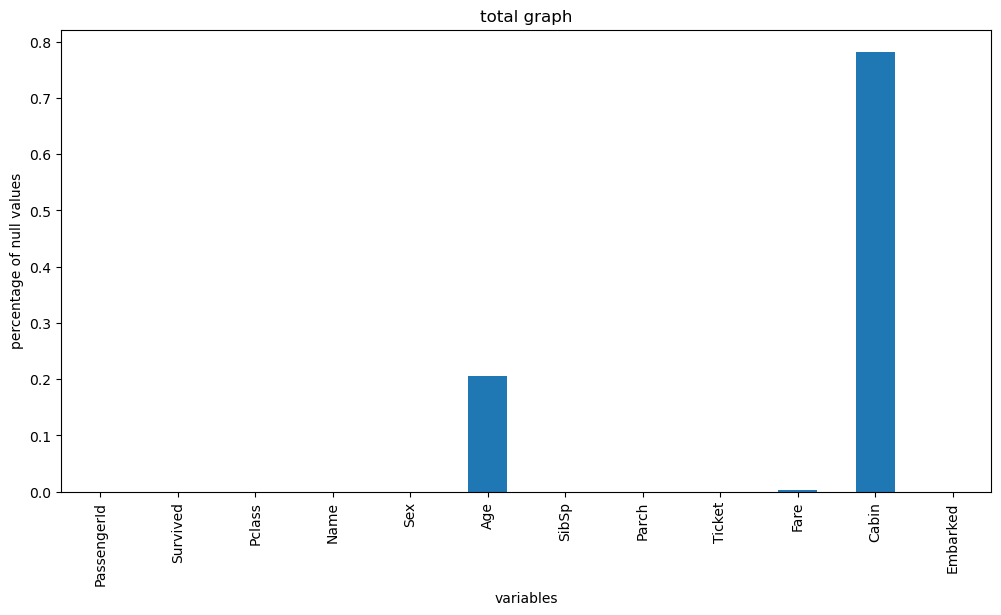

In [20]:
#data.isnull().sum().plot.bar(figsize=(12,6))
data.isnull().mean().plot.bar(figsize=(12,6))
plt.xlabel('variables')
plt.ylabel('percentage of null values')
plt.title('total graph')


<AxesSubplot:>

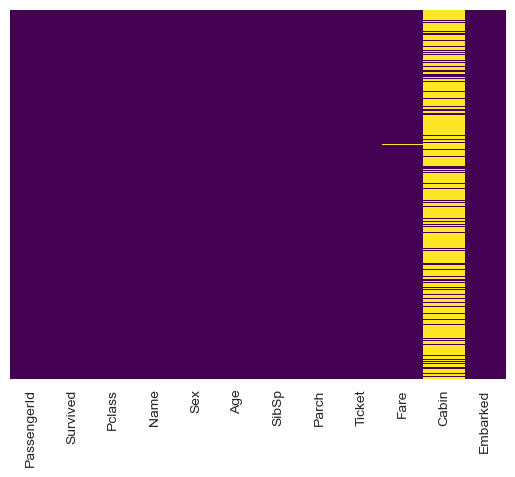

In [51]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

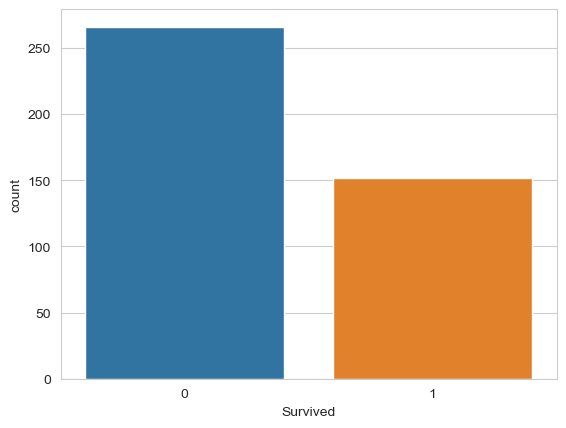

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

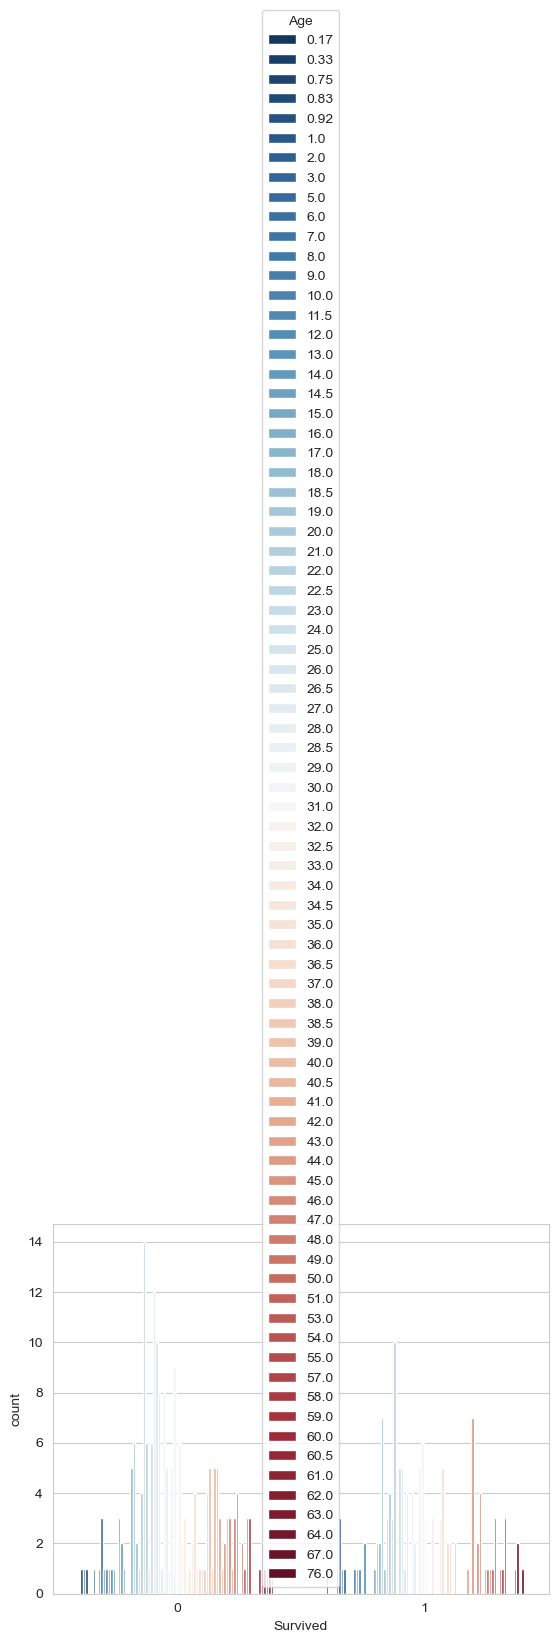

In [24]:
sns.countplot(x='Survived',hue='Age',data=data,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

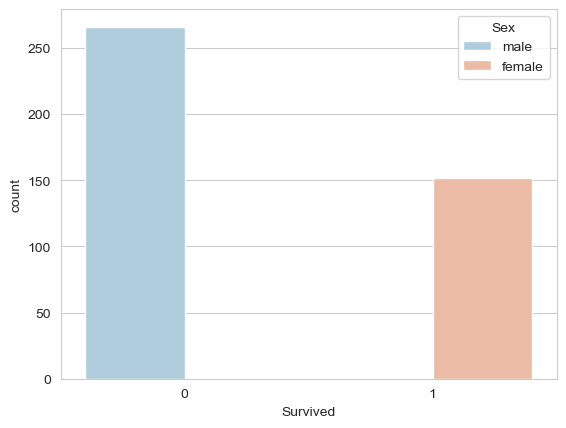

In [25]:
sns.countplot(x='Survived',hue='Sex',data=data,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

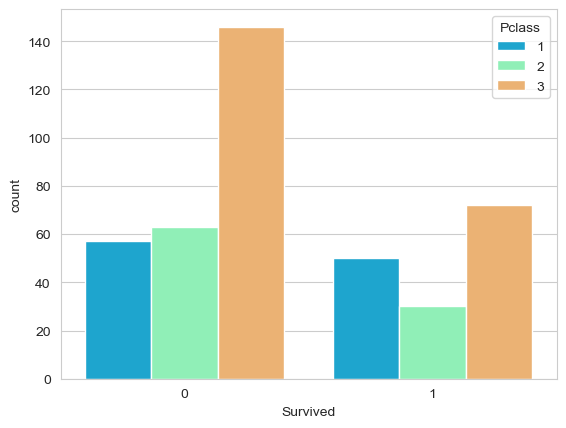

In [29]:
sns.countplot(x='Survived',hue='Pclass',data=data,palette='rainbow')

<AxesSubplot:xlabel='Age'>

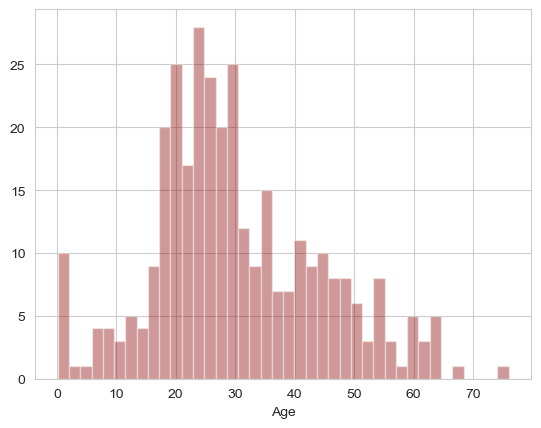

In [31]:
sns.distplot(data['Age'],kde=False,color='darkred',bins=40)
#sns.distplot(data['Age'].dropna(),kde=False,color='darkred',bins=40)


<AxesSubplot:>

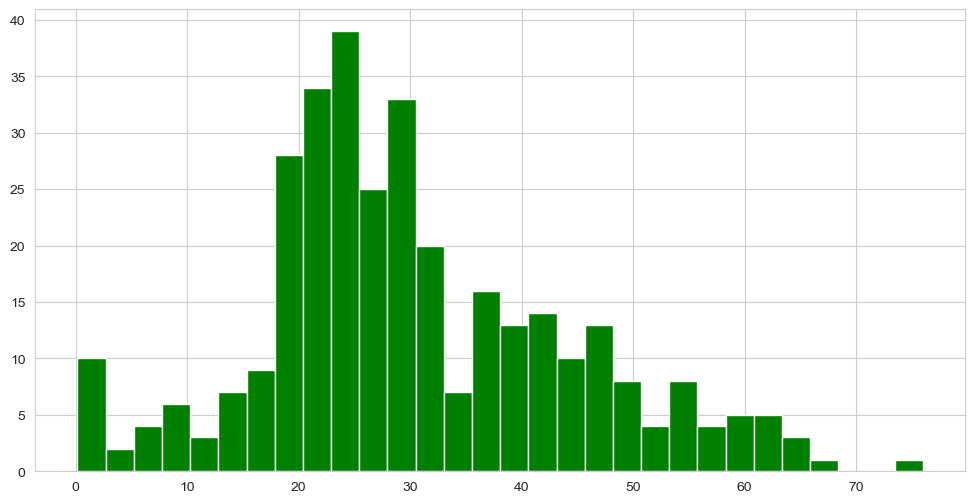

In [37]:
#data['Survived'].hist(color='green',bins=30,figsize=(12,6))
data['Age'].hist(color='green',bins=30,figsize=(12,6))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

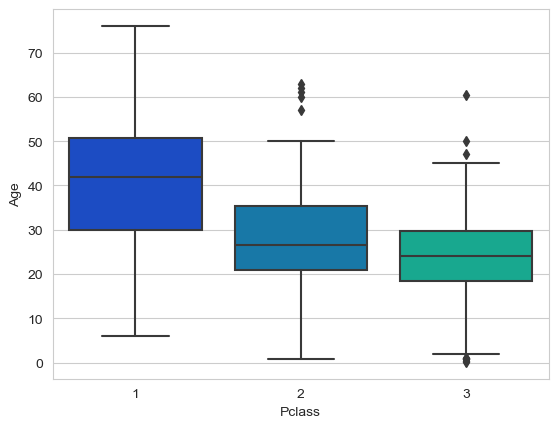

In [43]:
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

In [45]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else :
            return 24
    else:
            return Age
        

In [55]:
data['Age']=data[['Age','Pclass']].apply(impute_age,axis=1)

In [52]:
data.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

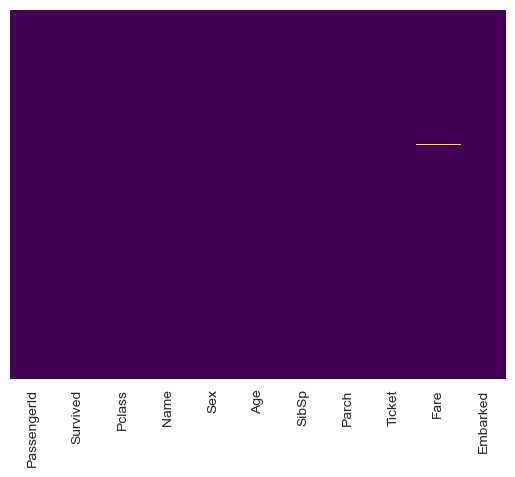

In [53]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [54]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [66]:
def impute_fare(cols):
    Fare=cols[0]
    Pclass=cols[1]
    if pd.isnull(Fare):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else :
            return 24
    else:
            return Fare
        

In [67]:
data['Fare']=data[['Fare','Pclass']].apply(impute_fare,axis=1)

<AxesSubplot:>

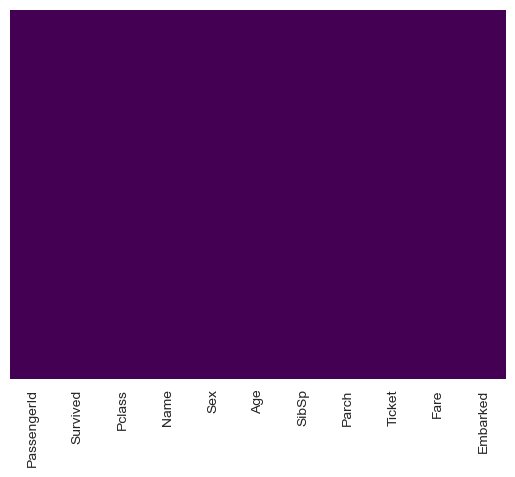

In [68]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')